In [1]:
import numpy as np
from scipy.sparse.linalg import LinearOperator
from numpy.fft import fft, ifft
from scipy.linalg import circulant, toeplitz

import jlinops

import matplotlib.pyplot as plt

In [2]:
def circulant_linear_operator(first_column):
    """
    Create a LinearOperator that represents a circulant matrix.

    :param first_column: The first column of the circulant matrix.
    :return: A LinearOperator for matrix-vector multiplication.
    """
    n = len(first_column)
    first_col_fft = fft(first_column)

    def matvec(v):
        v_fft = fft(v)
        result_fft = first_col_fft * v_fft  # Element-wise multiplication
        return np.real(ifft(result_fft))  # Inverse FFT and take the real part

    return LinearOperator((n, n), matvec=matvec, rmatvec=matvec)

# Example Usage
first_column = np.array([1, 2, 3])  # Define the first column of the circulant matrix
C = circulant_linear_operator(first_column)
v = np.array([4, 5, 6])  # Vector for multiplication
result = C @ v  # Perform the matrix-vector multiplication
print(result)


[31. 31. 28.]


In [12]:
Cr = circulant(first_column)

In [13]:
Cr @ v

array([31, 31, 28])

In [14]:
n = 100

In [38]:
n = 5
n_samples = 100
for j in range(n_samples):
    first_column = np.random.normal(size=n)
    C = circulant_linear_operator(first_column)
    v = np.random.normal(size=n)
    Cr = circulant(first_column)
    assert np.linalg.norm( (C @ v) - (Cr @ v)  ) < 1e-3, "Not correct"

In [40]:
n = 100
n_samples = 100
for j in range(n_samples):
    first_column = np.random.normal(size=n)
    C = circulant_linear_operator(first_column)
    v = np.random.normal(size=n)
    Cr = circulant(first_column)
    print(np.linalg.norm( (C.rmatvec(v) ) - (Cr.T @ v)  ))
    #assert np.linalg.norm( (C.T @ v) - (Cr.T @ v)  ) < 1e-1, "Not correct"

176.13943311292007
115.62931879258893
132.62271533133702
140.52621885121448
110.13200119830472
146.22857980951582
122.97423384403139
106.46972528833238
125.44706474084792
128.1351601930726
115.40562967645646
112.77586195881699
118.6055269149483
124.59134504756629
134.50934689526088
116.02125450957556
190.95713079940194
154.58545371860126
135.78148697048712
116.64652251303923
129.23666567258903
99.61615408031777
122.75012180015524
170.73625714795335
145.387635355065
155.8543664035105
170.85661238699157
121.15936434088779
96.6570821958491
132.029855907106
186.62396500118777
132.32560389748016
159.73132704904046
129.57839052920173
154.98614895537517
124.38949415020707
129.14060451648933
124.7301244380725
110.34805953263728
152.7236605473366
133.44040224217312
133.02835776241037
105.37138317835063
156.93704920356097
156.05692006358478
162.09920976796593
143.25863232274668
133.1910206330656
128.70367250856881
121.74996780972646
146.66094225806341
124.65070069260528
111.04297149711859
126.17

In [31]:
np.linalg.norm( jlinops.black_box_to_dense(C) - Cr )

2.4228769908874864e-14

In [35]:
np.linalg.norm( jlinops.black_box_to_dense(C).T - Cr.T )

2.356168165383422e-14

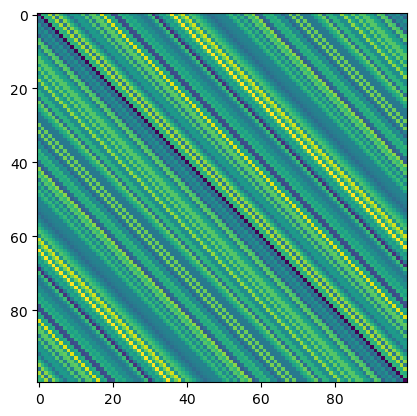

In [36]:
plt.imshow(Cr)
plt.show()

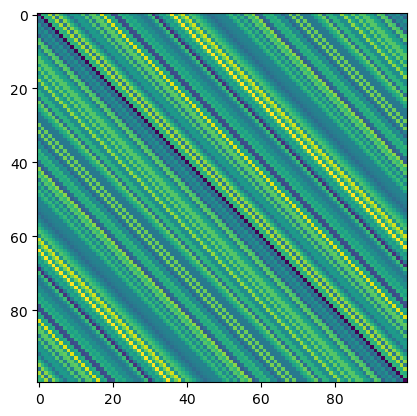

In [37]:
plt.imshow(jlinops.black_box_to_dense(C))
plt.show()

# Build jlinops

In [42]:
from jlinops import _CustomLinearOperator

In [43]:
from jlinops import get_device

In [63]:
# class CirculantOperator(_CustomLinearOperator):
#     """Represents a circulant LinearOperator.
#     """
#     def __init__(self, column):

#         # Store column
#         self.column = column

#         # shape
#         n = len(self.column)

#         # Get device
#         device = get_device(self.column)

#         if device == "cpu":
            
#             self.first_col_fft = fft(first_column)
#             self.first_col_fft_conj = np.conj(self.first_col_fft)

#             def _matvec(v):
#                 v_fft = fft(v)
#                 result_fft = self.first_col_fft * v_fft  # Element-wise multiplication
#                 return np.real(ifft(result_fft))  # Inverse FFT and take the real part
            
#             def _rmatvec(v):
#                 v_fft = fft(v)
#                 result_fft = self.first_col_fft_conj * v_fft
#                 return np.real(ifft(result_fft))
            
#         else:

#             self.first_col_fft = fft(first_column)
#             self.first_col_fft_conj = np.conj(self.first_col_fft)

#             def _matvec(v):
#                 v_fft = fft(v)
#                 result_fft = self.first_col_fft * v_fft  # Element-wise multiplication
#                 return np.real(ifft(result_fft))  # Inverse FFT and take the real part
            
#             def _rmatvec(v):
#                 v_fft = fft(v)
#                 result_fft = self.first_col_fft_conj * v_fft
#                 return np.real(ifft(result_fft))

#         super().__init__((n,n), _matvec, _rmatvec, device=device)

#     def to_gpu(self):
#         return CirculantOperator(cp.asarray(self.column))
    
#     def to_cpu(self):
#         return CirculantOperator(cp.asnumpy(self.column))

In [2]:
n = 5
n_samples = 100
for j in range(n_samples):
    first_column = np.random.normal(size=n)
    C = jlinops.CirculantOperator(first_column)
    v = np.random.normal(size=n)
    Cr = circulant(first_column)
    assert np.linalg.norm( (C @ v) - (Cr @ v)  ) < 1e-3, "Not correct"

In [3]:
jlinops.check_adjoint(C)

True

In [4]:
Cmat = jlinops.black_box_to_dense(C)
Ctmat = jlinops.black_box_to_dense(C.T)

In [5]:
np.linalg.norm(Cmat.T - Ctmat)

3.925231146709438e-16

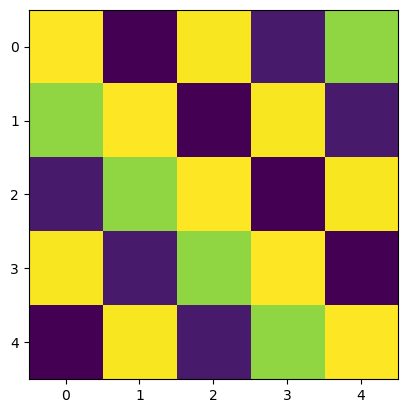

In [70]:
plt.imshow(Cmat.T)
plt.show()

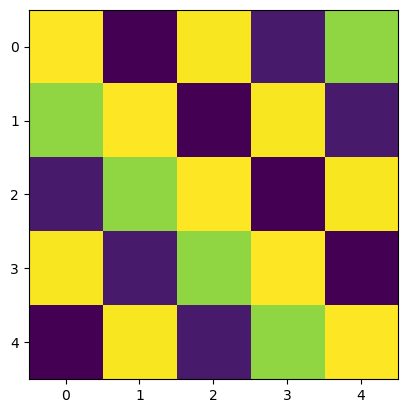

In [71]:
plt.imshow(Ctmat)
plt.show()

In [ ]:
def random_circulant_matrix(n, which="matrix"):
    """Generates a random circulant matrix.
    """
    
    # Draw random column vector
    col = np.random.normal(size=n)

    if which == "matrix":
        return circulant(col)

    elif which == "operator":
        return CirculantOperator(col)

    else:
        raise NotImplementedError

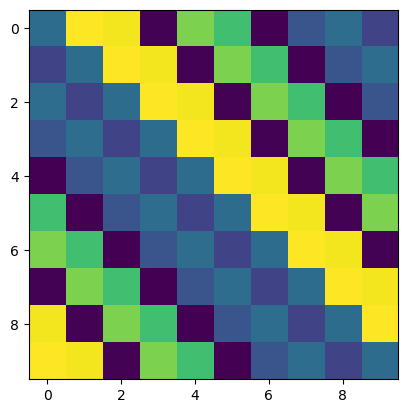

In [4]:
plt.imshow( jlinops.random_circulant_matrix(10) )
plt.show()

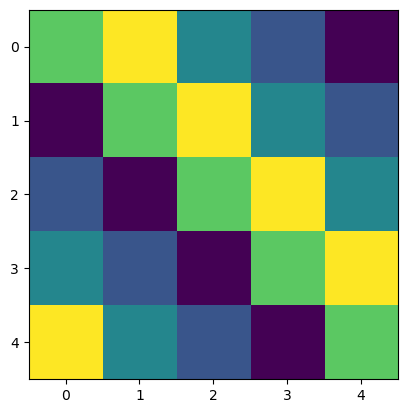

In [6]:
plt.imshow( jlinops.black_box_to_dense(jlinops.random_circulant_matrix(5, which="operator")) )
plt.show()